# Project: Wrangling and Analyze Data

In [1]:
#import statements for all of the packages that I plan to use.
import pandas as pd
import requests
import os
import tweepy
from timeit import default_timer as timer
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Use set option expand the output display of text
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
#reading twitter-archive-enhanced.csv to dataframe
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#download images_predictions.tsv programmatically
#make directory folder to store file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [6]:
#define url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#get the tsv file in the computers working memory
response = requests.get(url)
#access the content
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    #use the Requests.content method and some basic file I/O to save this file to my computer
    file.write(response.content)

In [7]:
#read into the data frame
predictions_df = pd.read_csv(r'C:\Users\Hyfi\image_predictions\image-predictions.tsv', sep = '\t')

In [8]:
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
#create list of tweet ids from archive_df
tweet_id_list = archive_df['tweet_id'].tolist()

In [11]:
failed_tweet_dict = {}
start = timer()
#open a .txt file to save each tweets returned json
with open('tweet_json.txt', 'w') as file:
    #loop through each tweetid in list
    for tweet_id in tweet_id_list:
        #count each tweet id
        count = tweet_id_list.index(tweet_id) + 1
        #print count and tweet id
        print(str(count) + ':' + str(tweet_id))
        #get json data from tweepy api
        try:
            tweets = api.get_status(tweet_id, tweet_mode='extended')
            print('pass')
            #write each tweets json to .txt file
            json.dump(tweets._json, file)
            #add new line for each tweetid json data
            file.write('\n')
        #exception for deleted tweets with not found error
        except tweepy.TweepyException as error:
            print('failed')
            #mapping the tweet ids as keys to the exception as values in the empty dict failed_tweet_dict
            failed_tweet_dict[tweet_id] = error
            pass
end = timer()
print(end - start)
print(failed_tweet_dict)

1:892420643555336193
pass
2:892177421306343426
pass
3:891815181378084864
pass
4:891689557279858688
pass
5:891327558926688256
pass
6:891087950875897856
pass
7:890971913173991426
pass
8:890729181411237888
pass
9:890609185150312448
pass
10:890240255349198849
pass
11:890006608113172480
pass
12:889880896479866881
pass
13:889665388333682689
pass
14:889638837579907072
pass
15:889531135344209921
pass
16:889278841981685760
pass
17:888917238123831296
pass
18:888804989199671297
pass
19:888554962724278272
pass
20:888202515573088257
failed
21:888078434458587136
pass
22:887705289381826560
pass
23:887517139158093824
pass
24:887473957103951883
pass
25:887343217045368832
pass
26:887101392804085760
pass
27:886983233522544640
pass
28:886736880519319552
pass
29:886680336477933568
pass
30:886366144734445568
pass
31:886267009285017600
pass
32:886258384151887873
pass
33:886054160059072513
pass
34:885984800019947520
pass
35:885528943205470208
pass
36:885518971528720385
pass
37:885311592912609280
pass
38:88516

pass
297:837366284874571778
failed
298:837110210464448512
pass
299:837012587749474308
failed
300:836989968035819520
pass
301:836753516572119041
pass
302:836677758902222849
pass
303:836648853927522308
pass
304:836397794269200385
pass
305:836380477523124226
pass
306:836260088725786625
pass
307:836001077879255040
pass
308:835685285446955009
pass
309:835574547218894849
pass
310:835536468978302976
pass
311:835309094223372289
pass
312:835297930240217089
pass
313:835264098648616962
pass
314:835246439529840640
pass
315:835172783151792128
pass
316:835152434251116546
pass
317:834931633769889797
pass
318:834786237630337024
pass
319:834574053763584002
pass
320:834477809192075265
pass
321:834458053273591808
pass
322:834209720923721728
pass
323:834167344700198914
pass
324:834089966724603904
pass
325:834086379323871233
pass
326:833863086058651648
pass
327:833826103416520705
pass
328:833732339549220864
pass
329:833722901757046785
pass
330:833479644947025920
pass
331:833124694597443584
pass
332:8329981

pass
590:799308762079035393
pass
591:799297110730567681
pass
592:799063482566066176
pass
593:798933969379225600
pass
594:798925684722855936
pass
595:798705661114773508
pass
596:798701998996647937
pass
597:798697898615730177
pass
598:798694562394996736
pass
599:798686750113755136
pass
600:798682547630837760
pass
601:798673117451325440
pass
602:798665375516884993
pass
603:798644042770751489
pass
604:798628517273620480
pass
605:798585098161549313
pass
606:798576900688019456
pass
607:798340744599797760
pass
608:798209839306514432
pass
609:797971864723324932
pass
610:797545162159308800
pass
611:797236660651966464
pass
612:797165961484890113
pass
613:796904159865868288
pass
614:796865951799083009
pass
615:796759840936919040
pass
616:796563435802726400
pass
617:796484825502875648
pass
618:796387464403357696
pass
619:796177847564038144
pass
620:796149749086875649
pass
621:796125600683540480
pass
622:796116448414461957
pass
623:796080075804475393
pass
624:796031486298386433
pass
625:79546433100

pass
883:760290219849637889
pass
884:760252756032651264
pass
885:760190180481531904
pass
886:760153949710192640
pass
887:759943073749200896
pass
888:759923798737051648
failed
889:759846353224826880
pass
890:759793422261743616
pass
891:759566828574212096
failed
892:759557299618865152
pass
893:759447681597108224
pass
894:759446261539934208
pass
895:759197388317847553
pass
896:759159934323924993
pass
897:759099523532779520
pass
898:759047813560868866
pass
899:758854675097526272
pass
900:758828659922702336
pass
901:758740312047005698


Rate limit reached. Sleeping for: 361


failed
902:758474966123810816
pass
903:758467244762497024
pass
904:758405701903519748
pass
905:758355060040593408
pass
906:758099635764359168
pass
907:758041019896193024
pass
908:757741869644341248
pass
909:757729163776290825
pass
910:757725642876129280
pass
911:757611664640446465
pass
912:757597904299253760
pass
913:757596066325864448
pass
914:757400162377592832
pass
915:757393109802180609
pass
916:757354760399941633
pass
917:756998049151549440
pass
918:756939218950160384
pass
919:756651752796094464
pass
920:756526248105566208
pass
921:756303284449767430
pass
922:756288534030475264
pass
923:756275833623502848
pass
924:755955933503782912
pass
925:755206590534418437
pass
926:755110668769038337
pass
927:754874841593970688
pass
928:754856583969079297
pass
929:754747087846248448
pass
930:754482103782404096
pass
931:754449512966619136
pass
932:754120377874386944
pass
933:754011816964026368
failed
934:753655901052166144
pass
935:753420520834629632
pass
936:753398408988139520
pass
937:7533756

pass
1188:718460005985447936
pass
1189:718454725339934721
pass
1190:718246886998687744
pass
1191:718234618122661888
pass
1192:717841801130979328
pass
1193:717790033953034240
pass
1194:717537687239008257
pass
1195:717428917016076293
pass
1196:717421804990701568
pass
1197:717047459982213120
pass
1198:717009362452090881
pass
1199:716802964044845056
pass
1200:716791146589110272
pass
1201:716730379797970944
pass
1202:716447146686459905
pass
1203:716439118184652801
pass
1204:716285507865542656
pass
1205:716080869887381504
pass
1206:715928423106027520
pass
1207:715758151270801409
pass
1208:715733265223708672
pass
1209:715704790270025728
pass
1210:715696743237730304
pass
1211:715680795826982913
pass
1212:715360349751484417
pass
1213:715342466308784130
pass
1214:715220193576927233
pass
1215:715200624753819648
pass
1216:715009755312439296
pass
1217:714982300363173890
pass
1218:714962719905021952
pass
1219:714957620017307648
pass
1220:714631576617938945
pass
1221:714606013974974464
pass
1222:7144

pass
1471:694001791655137281
pass
1472:693993230313091072
pass
1473:693942351086120961
pass
1474:693647888581312512
pass
1475:693644216740769793
pass
1476:693642232151285760
pass
1477:693629975228977152
pass
1478:693622659251335168
pass
1479:693590843962331137
pass
1480:693582294167244802
pass
1481:693486665285931008
pass
1482:693280720173801472
pass
1483:693267061318012928
pass
1484:693262851218264065
pass
1485:693231807727280129
pass
1486:693155686491000832
pass
1487:693109034023534592
pass
1488:693095443459342336
pass
1489:692919143163629568
pass
1490:692905862751522816
pass
1491:692901601640583168
pass
1492:692894228850999298
pass
1493:692828166163931137
pass
1494:692752401762250755
pass
1495:692568918515392513
pass
1496:692535307825213440
pass
1497:692530551048294401
pass
1498:692423280028966913
pass
1499:692417313023332352
pass
1500:692187005137076224
pass
1501:692158366030913536
pass
1502:692142790915014657
pass
1503:692041934689402880
pass
1504:692017291282812928
pass
1505:6918

pass
1754:678800283649069056
pass
1755:678798276842360832
pass
1756:678774928607469569
pass
1757:678767140346941444
pass
1758:678764513869611008
pass
1759:678755239630127104
pass
1760:678740035362037760
pass
1761:678708137298427904
pass
1762:678675843183484930
pass
1763:678643457146150913
pass
1764:678446151570427904
pass
1765:678424312106393600
pass
1766:678410210315247616
pass
1767:678399652199309312
pass
1768:678396796259975168
pass
1769:678389028614488064
pass
1770:678380236862578688
pass
1771:678341075375947776
pass
1772:678334497360859136
pass
1773:678278586130948096
pass
1774:678255464182861824
pass
1775:678023323247357953
pass
1776:678021115718029313
pass
1777:677961670166224897
pass
1778:677918531514703872
pass
1779:677895101218201600
pass
1780:677716515794329600
pass
1781:677700003327029250
pass
1782:677698403548192770
pass
1783:677687604918272002
pass
1784:677673981332312066
pass
1785:677662372920729601
pass
1786:677644091929329666
pass
1787:677573743309385728
pass
1788:6775

Rate limit reached. Sleeping for: 351


failed
1803:676949632774234114
pass
1804:676948236477857792
pass
1805:676946864479084545
pass
1806:676942428000112642
pass
1807:676936541936185344
pass
1808:676916996760600576
pass
1809:676897532954456065
pass
1810:676864501615042560
pass
1811:676821958043033607
pass
1812:676819651066732545
pass
1813:676811746707918848
pass
1814:676776431406465024
pass
1815:676617503762681856
pass
1816:676613908052996102
pass
1817:676606785097199616
pass
1818:676603393314578432
pass
1819:676593408224403456
pass
1820:676590572941893632
pass
1821:676588346097852417
pass
1822:676582956622721024
pass
1823:676575501977128964
pass
1824:676533798876651520
pass
1825:676496375194980353
pass
1826:676470639084101634
pass
1827:676440007570247681
pass
1828:676430933382295552
pass
1829:676263575653122048
pass
1830:676237365392908289
pass
1831:676219687039057920
pass
1832:676215927814406144
pass
1833:676191832485810177
pass
1834:676146341966438401
pass
1835:676121918416756736
pass
1836:676101918813499392
pass
1837:67

pass
2086:670804601705242624
pass
2087:670803562457407488
pass
2088:670797304698376195
pass
2089:670792680469889025
pass
2090:670789397210615808
pass
2091:670786190031921152
pass
2092:670783437142401025
pass
2093:670782429121134593
pass
2094:670780561024270336
pass
2095:670778058496974848
pass
2096:670764103623966721
pass
2097:670755717859713024
pass
2098:670733412878163972
pass
2099:670727704916926465
pass
2100:670717338665226240
pass
2101:670704688707301377
pass
2102:670691627984359425
pass
2103:670679630144274432
pass
2104:670676092097810432
pass
2105:670668383499735048
pass
2106:670474236058800128
pass
2107:670468609693655041
pass
2108:670465786746662913
pass
2109:670452855871037440
pass
2110:670449342516494336
pass
2111:670444955656130560
pass
2112:670442337873600512
pass
2113:670435821946826752
pass
2114:670434127938719744
pass
2115:670433248821026816
pass
2116:670428280563085312
pass
2117:670427002554466305
pass
2118:670421925039075328
pass
2119:670420569653809152
pass
2120:6704

In [12]:
empty_list = []
with open('tweet_json.txt') as file:
    for tweet in file:
        data = json.loads(tweet)
        tweet_id = data['id']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        empty_list.append({'tweet_id' : tweet_id,
                'favorite_count' : favorite_count,
                'retweet_count' : retweet_count})

In [13]:
tweet_api_df = pd.DataFrame(empty_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

In [14]:
tweet_api_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33810,7009
1,892177421306343426,29330,5302
2,891815181378084864,22054,3481
3,891689557279858688,36940,7226
4,891327558926688256,35310,7761


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual assessment- archive_df
1. Null values in multiple columns
2. Some tweets are not original and are replies or retweets  
3. Individual column for each dog stage

In [15]:
archive_df.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1394,700002074055016451,NaN,NaN,2016-02-17 17:01:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Thumas. He covered himself in nanners for maximum camouflage. It didn't work. I can still see u Thumas. 9/10 https://t.co/x0ZDlNqfb1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700002074055016451/photo/1,9,10,Thumas,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142660169732/photo/1,11,10,very,None,None,None,None
2067,671141549288370177,NaN,NaN,2015-11-30 01:39:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Neat pup here. Enjoys lettuce. Long af ears. Short lil legs. Hops surprisingly high for dog. 9/10 still very petable https://t.co/HYR611wiA4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671141549288370177/photo/1,9,10,None,None,None,None,None
2227,668268907921326080,NaN,NaN,2015-11-22 03:24:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an Azerbaijani Buttermilk named Guss. He sees a demon baby Hitler behind his owner. 10/10 stays alert https://t.co/aeZykWwiJN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668268907921326080/photo/1,10,10,None,None,None,None,None


### Visual assessment - predictions_df
1. Contains three sets of image prediction including predications that are false
2. Contains underscore and hyphen in names of dog predictions
3. Casing is not uniform across names of dog prediction 

In [16]:
predictions_df.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
812,692530551048294401,https://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg,1,Siberian_husky,0.486428,True,Eskimo_dog,0.448518,True,white_wolf,0.041506,False
1144,730211855403241472,https://pbs.twimg.com/media/CiI7zVZUoAEzGW7.jpg,1,pug,0.341663,True,Norwegian_elkhound,0.171222,True,German_shepherd,0.124687,True
1166,735635087207878657,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,pug,0.891871,True,goose,0.014377,False,fur_coat,0.008451,False
1042,712438159032893441,https://pbs.twimg.com/media/CeMWubMWwAA6GwF.jpg,1,ice_bear,0.869477,False,Great_Pyrenees,0.069457,True,Labrador_retriever,0.024740,True


### Visual assessment - tweet_api_df
- No data quality issues visible visually

In [17]:
tweet_api_df.sample(4)

,tweet_id,favorite_count,retweet_count
1714,679158373988876288,19459,7251
1345,701952816642965504,3546,933
1090,731285275100512256,3225,904
2242,667470559035432960,225,85


### Programmatic assessment- archive_df
1. Erroneous datatypes:
   - **tweet_id** should be `string` not `int`
   - **timestamp** should be `datetime` not `object`
   - **dog stages** columns are `categories` not `object` 

In [18]:
archive_df.shape

(2356, 17)

In [19]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
#check for duplicate values
sum(archive_df.duplicated())

0

In [21]:
#check for null values
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

- the reply and retweeted columns have a lot null values

In [22]:
#check for unique values
archive_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

- rating denominator column should have only one value

In [23]:
archive_df[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.So I will focus on the denominator column
- The max value of rating_denominator is incorrect

> - **Find rating_denominator not equal to 10 and verify from tweet text**

In [24]:
archive_df.loc[archive_df['rating_denominator'] != 10][['tweet_id', 'text','rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


- Some Rating numerator and denominator do not matching with the tweet text

In [25]:
archive_df.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Buddy               7
Toby                7
an                  7
Bailey              7
Leo                 6
Oscar               6
Stanley             6
Rusty               6
Bella               6
Dave                6
Jack                6
Koda                6
Scout               6
Jax                 6
Milo                6
Louis               5
Phil                5
Sammy               5
Gus                 5
Chester             5
Alfie               5
Sunny               5
Bentley             5
very                5
Oakley              5
Finn                5
George              5
Larry               5
Clarence            4
Loki                4
Walter              4
Reggie    

- > Some `strange` names are present,like `a`, `the`, `an`, `very`, `just`, `one`, `not`. These names appear to be lower case

In [26]:
# Get strange names
archive_df.name[archive_df.name.str.islower()].value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

### Programmatic assessment- predictions_df
1. Erroneous datatypes:
   - **tweet_id** should be `string` not `int` 

In [27]:
predictions_df.shape

(2075, 12)

In [28]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
#check for duplicate values
sum(predictions_df.duplicated())

0

In [30]:
#check for null values
predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [31]:
#check for unique values
predictions_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

### Programmatic assessment- tweet_api_df.
1. Erroneous datatypes:
   - **tweet_id** should be `string` not `int` 

In [32]:
tweet_api_df.shape

(2325, 3)

In [33]:
tweet_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   favorite_count  2325 non-null   int64
 2   retweet_count   2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [34]:
#check for duplicate values
sum(tweet_api_df.duplicated())

0

In [35]:
#check for null values
tweet_api_df.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [36]:
#check for unique values
tweet_api_df.nunique()

tweet_id          2325
favorite_count    1970
retweet_count     1667
dtype: int64

- > **Check for duplicated columns in the datasets**

In [37]:
all_columns = pd.Series(list(archive_df) + list(predictions_df) + list(tweet_api_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

- The tweet_id column is duplicated in all 3 datasets
- The datasets can be combined into one single dataframe to improve tidiness

### Quality issues

####  archive_df

- There are replies and retweets along with original tweet ratings observations
- Redundant columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,    retweeted_status_timestamp,expanded_urls,source
- Erroneous datatypes:
        - tweet_id should be string not int
        - timestamp should be datetime not object
        - dog stages columns are categories not object
- rating denominator column should have only one value
- Some Rating numerator and denominator do not matching with the tweet text
- Some strange values in the name column are present,like `a, the, an, very, just, one, not`. These names appear to be lower case


#### predictions_df
- Contains underscore and hyphen in names of dog predictions
- Casing is not uniform across names of dog prediction
- Erroneous datatype for tweet_id, should be string not int


#### tweet_api_df
- Erroneous datatype for tweet_id, should be string not int

### Tidiness issues

#### General
- The tweet_id column is duplicated in all 3 datasets.The datasets can be combined into one single dataframe to improve tidiness

####  archive_df

- There is an individual column for each dog stage (doggo, floofer, pupper, puppo)


#### predictions_df
- Contains three image prediction columns including predications that are false

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [38]:
# Make copies of original pieces of data
archive_clean = archive_df.copy()
predictions_clean = predictions_df.copy()
tweet_api_clean = tweet_api_df.copy()

### Issue #1:
 
#### There are replies and retweets  in the dataset along with original tweet ratings observations

#### Define: 
Remove retweets and replys observations by dropping rows where the values for `retweeted_status_id` and `in_reply_to_status_id` are not null using `isnull` method

#### Code

In [39]:
# Slice the rows which are original tweets
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull() & archive_clean['in_reply_to_status_id'].isnull()]

#### Test

In [40]:
# Check that only original tweets remain
assert archive_clean.retweeted_status_id.notnull().sum() == 0
assert archive_clean.in_reply_to_status_id.notnull().sum() == 0

### Issue #2:
Redundant columns: `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp`

#### Define:
Drop `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls,source` columns

#### Code

In [41]:
# redundant columns
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'source'], axis = 1 , inplace = True)

#### Test

In [42]:
# Check whether columns have been dropped
archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #3: 
There is an individual column for each dog stage (doggo, floofer, pupper, puppo)

#### Define:
Combine individual dog stages columns (doggo, floofer, pupper, puppo) into single column dog_stages by concatenating them.

#### Code

In [43]:
# Function to replace 'None' values with empty string
def none_replace(stages):
    for stage in range(0, len(stages)):
        archive_clean[stages[stage]].replace('None', '', inplace=True)

# dog stage list        
dog_stage_list = ['doggo', 'floofer', 'pupper', 'puppo']

# call null_none_replace function
none_replace(dog_stage_list)

In [44]:
#Create 'dog_stages' column by concatenating the individual columns 'doggo', 'floofer', 'pupper', 'puppo'  
archive_clean['dog_stages'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# replace empty string with 'None' to avoid missing values
archive_clean.dog_stages.replace('', 'None', inplace=True)

In [45]:
# display the dog stages value_counts
archive_clean.dog_stages.value_counts()

None            1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

- Some rows have  multiple dog stages doggopupper, doggopuppo, doggofloofer

In [46]:
# seperate the rows with multiple stages name by comma 
archive_clean.loc[archive_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo,pupper'
archive_clean.loc[archive_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo,floofer'
archive_clean.loc[archive_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo,puppo'


In [47]:
#drop the other individual dog stages columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1 , inplace = True)

#### Test

In [48]:
# Check whether individual dog stage columns have been dropped
archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [49]:
# display the dog stages value_counts
archive_clean.dog_stages.value_counts()

None             1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo,pupper        9
doggo,puppo         1
doggo,floofer       1
Name: dog_stages, dtype: int64

### Issue #4: 
predictions_clean contains three image prediction columns including predications that are false

#### Define:
Find the most confident `TRUE` image prediction and ignore the False predictions

#### Code

In [50]:
dog_breed = []
confidence = []
# define function to find the best prediction using only predictions for where dog prediction is true
def high_conf_pred (row):
    if row.p1_dog == True:
        dog_breed.append(row.p1)
        confidence.append(row.p1_conf)
    elif row.p2_dog == True:
        dog_breed.append(row.p2)
        confidence.append(row.p2_conf)
    elif row.p3_dog == True:
        dog_breed.append(row.p3)
        confidence.append(row.p3_conf)
    else:
        dog_breed.append('No breed predicted')
        confidence.append(0)

In [51]:
#apply the function to the dataframe
predictions_clean.apply(high_conf_pred, axis = 1)

#create new columns in dataframe for high confidence breed predictions
predictions_clean['dog_breed'] = dog_breed
predictions_clean['confidence'] = confidence

In [52]:
#make cofidence a percentage to make reading easier
predictions_clean['confidence'] = predictions_clean['confidence'] * 100

In [53]:
# drop the unwanted columns
predictions_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1 , inplace = True)

#### Test

In [54]:
# Check whether columns have been dropped
predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'dog_breed', 'confidence'], dtype='object')

In [55]:
# check for value_counts
predictions_clean.dog_breed.value_counts()

No breed predicted                324
golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
cocker_spaniel                     34
malamute                           34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Eskimo_dog                         22
Staffordshire_bullterrier          22
German_shepherd                    21
beagle                             21
Shih-Tzu                           20
Siberian_husky                     20
Maltese_dog                        19
Rottweiler                         19
Shetland_sheepdog                  19
Lakeland_terrier                   19
kuvasz      

### Issue #5: 
The tweet_id column is duplicated in all 3 datasets.The datasets can be combined into one single dataframe to improve tidiness

#### Define:
Merge the datasets into a single dataframe using the pd.merge method

#### Code

In [56]:
# Merge the datasets
twitter_data_cleaned = pd.merge(archive_clean, predictions_clean, how='left', on= ['tweet_id'])
twitter_data_cleaned = pd.merge(twitter_data_cleaned, tweet_api_clean, how='left', on= ['tweet_id'])

#### Test

In [57]:
#check tweet id is not duplicated
twitter_data_cleaned.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages', 'jpg_url', 'dog_breed',
       'confidence', 'favorite_count', 'retweet_count'],
      dtype='object')

### Issue #6: 
Erroneous datatypes:
  - `tweet_id` should be` string` not `int`
  - `timestamp` should be `datetime` not `object`
  - `dog stages` columns are `categories` not `object`

#### Define:
-  convert `tweet_id` to ` string` datatype
- convert `timestamp` to `datetime` datatype
- convert `dog stages` to `categories` datatype

#### Code

In [58]:
twitter_data_cleaned['tweet_id'] = twitter_data_cleaned['tweet_id'].astype(str)
twitter_data_cleaned['dog_stages'] = twitter_data_cleaned['dog_stages'].astype('category')
twitter_data_cleaned['timestamp'] =  pd.to_datetime(twitter_data_cleaned['timestamp'])

#### Test

In [59]:
#check datatypes of columns
twitter_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                2097 non-null   object             
 6   dog_stages          2097 non-null   category           
 7   jpg_url             1971 non-null   object             
 8   dog_breed           1971 non-null   object             
 9   confidence          1971 non-null   float64            
 10  favorite_count      2087 non-null   float64            
 11  retweet_count       2087 non-null   float64            
dtypes: category(1), datetime64[ns, UTC

### Issue #7: 
Some ating numerators and denominators do not matching with the tweet text

#### Define:
Use the ratings from the text column to manually correct the rating numerator and denominator which have incorrect values 

#### Code

In [60]:
# where rating_denominator is not equal to 10
twitter_data_cleaned.loc[twitter_data_cleaned['rating_denominator'] != 10][['tweet_id', 'text','rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
339,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
403,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
700,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
853,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
904,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
948,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
985,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1011,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1036,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1056,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [61]:
#820690176645140481 - 84/70

# tweet_id '810984652412424192' doesn't have rating, i will assign a 10/10 rating
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '810984652412424192', ['rating_numerator', 'rating_denominator']] = [10, 10]

#758467244762497024 - 165/150

#tweet_id '740373189193256964' - 14/10
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '740373189193256964', ['rating_numerator', 'rating_denominator']] = [14, 10]

#731156023742988288 - 204/170

#tweet_id '722974582966214656' - 13/10
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '722974582966214656', ['rating_numerator', 'rating_denominator']] = [13, 10]

#tweet_id '716439118184652801' - 11/10
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '716439118184652801', ['rating_numerator', 'rating_denominator']] = [11, 10]

#713900603437621249 - 99/90

#710658690886586372 - 80/80

#709198395643068416 - 45/50

#704054845121142784 - 60/50

#697463031882764288 - 44/40

#684222868335505415 - 121/110

#tweet_id '682962037429899265' - 10, 10
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '682962037429899265', ['rating_numerator', 'rating_denominator']] = [10, 10]

#677716515794329600 - 144/120

#675853064436391936 - 88/80

#tweet_id '666287406224695296' - 9, 10
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '666287406224695296', ['rating_numerator', 'rating_denominator']] = [9, 10]

> **Some tweet_ids have denominators greater than 10, so for uniformity I will create a new column `ratings`by dividing the numerator by the denominator**

In [62]:
twitter_data_cleaned['ratings'] = twitter_data_cleaned['rating_numerator']/twitter_data_cleaned['rating_denominator']

#### Test

In [63]:
# verify the rating_numerator, rating_denominator, ratings columns 
twitter_data_cleaned.loc[twitter_data_cleaned['rating_denominator'] != 10][['tweet_id','rating_numerator', 'rating_denominator', 'ratings']]

,tweet_id,rating_numerator,rating_denominator,ratings
339,820690176645140481,84,70,1.2
700,758467244762497024,165,150,1.1
904,731156023742988288,204,170,1.2
1011,713900603437621249,99,90,1.1
1036,710658690886586372,80,80,1.0
1056,709198395643068416,45,50,0.9
1129,704054845121142784,60,50,1.2
1210,697463031882764288,44,40,1.1
1399,684222868335505415,121,110,1.1
1540,677716515794329600,144,120,1.2


### Issue #8: 
Some strange values in the name column are present,like `a, the, an, very, just, one, not`. These names appear to be lower case

#### Define:
- Use names where available from `text` column to manually correct the entries in name column which have incorrect values 
- Use string regex to find the other names using islower and replace it with `None`

#### Code

In [64]:
# Get strange names
twitter_data_cleaned.name[twitter_data_cleaned.name.str.islower()].value_counts()

a               55
the              8
an               6
one              4
very             4
quite            3
just             3
getting          2
not              2
actually         2
old              1
light            1
life             1
officially       1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
mad              1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [65]:
#rows where name is lower case
twitter_data_cleaned.loc[twitter_data_cleaned.name.str.islower()][['name', 'text', 'tweet_id']]

,name,text,tweet_id
21,such,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,887517139158093824
51,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,881536004380872706
141,quite,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,859196978902773760
156,quite,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",855459453768019968
263,not,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,832645525019123713
289,one,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",828650029636317184
424,incredibly,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,806219024703037440
494,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,792913359805018113
616,a,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,772581559778025472
631,very,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,770655142660169732


In [66]:
#tweet_id '828650029636317184' - Grace
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '828650029636317184', ['name']] = ['Grace']

#tweet_id '792913359805018113' - Forrest
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '792913359805018113', ['name']] = ['Forrest']

#tweet_id '765395769549590528' - Zoey
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '765395769549590528', ['name']] = ['Zoey']

#tweet_id '748692773788876800' - Quizno
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '748692773788876800', ['name']] = ['Quizno']

#tweet_id '675706639471788032' - Wylie
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '675706639471788032', ['name']] = ['Wylie']

#tweet_id '673636718965334016' - Kip
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '673636718965334016', ['name']] = ['Kip']

#tweet_id '671743150407421952' - Jacob
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '671743150407421952', ['name']] = ['Jacob']

#tweet_id '671147085991960577' - Rufus
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '671147085991960577', ['name']] = ['Rufus']

#tweet_id '670427002554466305' - Spork
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '670427002554466305', ['name']] = ['Spork']

#tweet_id '670361874861563904' - Cherokee
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '670361874861563904', ['name']] = ['Cherokee']

#tweet_id '670303360680108032' - Henry
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '670303360680108032', ['name']] = ['Henry']

#tweet_id '669923323644657664' - Alfred
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '669923323644657664', ['name']] = ['Alfred']

#tweet_id '669564461267722241' - Alfredo
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '669564461267722241', ['name']] = ['Alfredo']

#tweet_id '668955713004314625' - Leroi
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '668955713004314625', ['name']] = ['Leroi']

#tweet_id '668636665813057536' - Berta
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '668636665813057536', ['name']] = ['Berta']

#tweet_id '668507509523615744' - Chuk
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '668507509523615744', ['name']] = ['Chuk']

#tweet_id '668171859951755264' - Alfonso
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '668171859951755264', ['name']] = ['Alfonso']

#tweet_id '667861340749471744' - Cheryl
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '667861340749471744', ['name']] = ['Cheryl']

#tweet_id '667773195014021121' - Jessica
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '667773195014021121', ['name']] = ['Jessica']

#tweet_id '667538891197542400' - Klint
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '667538891197542400', ['name']] = ['Klint']

#tweet_id '667470559035432960' - Kohl
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '667470559035432960', ['name']] = ['Kohl']

#tweet_id '667177989038297088' - Daryl
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '667177989038297088', ['name']] = ['Daryl']

#tweet_id '666983947667116034' - Pepe
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '666983947667116034', ['name']] = ['Pepe']

#tweet_id '666781792255496192' - Octaviath
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '666781792255496192', ['name']] = ['Octaviath']

#tweet_id '666701168228331520' - John
twitter_data_cleaned.loc[twitter_data_cleaned['tweet_id'] == '666701168228331520', ['name']] = ['John']

In [67]:
#find the rest of the names with islower and replace it with 'None'
twitter_data_cleaned.name = twitter_data_cleaned.name.str.replace('^[a-z]+', 'None', regex=True)

#### Test

In [68]:
# check whether the dataframe has lowercase names
assert twitter_data_cleaned.name.str.islower().all() == False

### Issue #9: 
Underscore and hyphen in names of dog predictions

#### Define:
Replace `'_' and '-'` with empty strings in the `dog_breed` column

#### Code

In [69]:
# replace underscore and hyphen with empty string in the 
twitter_data_cleaned.dog_breed = twitter_data_cleaned.dog_breed.str.replace('_', ' ', regex=True)
twitter_data_cleaned.dog_breed = twitter_data_cleaned.dog_breed.str.replace('-', ' ', regex=True)

#### Test

In [70]:
# check whether '-' and '_' were remove from the dog breeds column
twitter_data_cleaned.dog_breed.unique()

array(['No breed predicted', 'Chihuahua', 'Labrador retriever', 'basset',
       'Chesapeake Bay retriever', 'Appenzeller', 'Pomeranian',
       'Irish terrier', 'Pembroke', 'Samoyed', 'French bulldog',
       'golden retriever', 'whippet', 'Siberian husky',
       'Mexican hairless', 'kuvasz', 'pug', 'Blenheim spaniel', nan,
       'malamute', 'Italian greyhound', 'chow', 'German shepherd',
       'Doberman', 'Eskimo dog', 'Weimaraner', 'Saluki',
       'miniature pinscher', 'German short haired pointer',
       'English springer', 'vizsla', 'bloodhound', 'Bernese mountain dog',
       'West Highland white terrier', 'cocker spaniel',
       'flat coated retriever', 'Cardigan', 'Newfoundland',
       'Shetland sheepdog', 'komondor', 'kelpie',
       'Greater Swiss Mountain dog', 'Border collie', 'bull mastiff',
       'Staffordshire bullterrier', 'Australian terrier',
       'Bouvier des Flandres', 'Bedlington terrier', 'Boston bull',
       'black and tan coonhound', 'Great Dane', 'st

### Issue #10: 
Casing is not uniform across names of dog prediction

#### Define:
Capitalize each word in the dog_breed column using the string title method. 

#### Code

In [71]:
twitter_data_cleaned.dog_breed = twitter_data_cleaned.dog_breed.str.title()

#### Test

In [72]:
#check whether the casing issue from the dog breeds column was corrected
twitter_data_cleaned.dog_breed.unique()

array(['No Breed Predicted', 'Chihuahua', 'Labrador Retriever', 'Basset',
       'Chesapeake Bay Retriever', 'Appenzeller', 'Pomeranian',
       'Irish Terrier', 'Pembroke', 'Samoyed', 'French Bulldog',
       'Golden Retriever', 'Whippet', 'Siberian Husky',
       'Mexican Hairless', 'Kuvasz', 'Pug', 'Blenheim Spaniel', nan,
       'Malamute', 'Italian Greyhound', 'Chow', 'German Shepherd',
       'Doberman', 'Eskimo Dog', 'Weimaraner', 'Saluki',
       'Miniature Pinscher', 'German Short Haired Pointer',
       'English Springer', 'Vizsla', 'Bloodhound', 'Bernese Mountain Dog',
       'West Highland White Terrier', 'Cocker Spaniel',
       'Flat Coated Retriever', 'Cardigan', 'Newfoundland',
       'Shetland Sheepdog', 'Komondor', 'Kelpie',
       'Greater Swiss Mountain Dog', 'Border Collie', 'Bull Mastiff',
       'Staffordshire Bullterrier', 'Australian Terrier',
       'Bouvier Des Flandres', 'Bedlington Terrier', 'Boston Bull',
       'Black And Tan Coonhound', 'Great Dane', 'St

In [73]:
twitter_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   rating_numerator    2097 non-null   int64              
 4   rating_denominator  2097 non-null   int64              
 5   name                2097 non-null   object             
 6   dog_stages          2097 non-null   category           
 7   jpg_url             1971 non-null   object             
 8   dog_breed           1971 non-null   object             
 9   confidence          1971 non-null   float64            
 10  favorite_count      2087 non-null   float64            
 11  retweet_count       2087 non-null   float64            
 12  ratings             2097 non-null 

### Issue #11: 
Non-null values preventing datatype conversion

#### Define:
- Remove all null values and convert datatypes
- convert `favorite_count` to `int` datatype
- convert  `retweet_count` to `int` datatype
- convert `confidence` to `int` datatype

#### Code

In [74]:
# drop all the null values to improve the quality of data
twitter_data_cleaned = twitter_data_cleaned.dropna(axis = 0,how = 'any')

In [75]:
#convert favorite_count to int datatype
#convert retweet_count to int datatype
#convert confidence to int datatype
twitter_data_cleaned['favorite_count'] = twitter_data_cleaned['favorite_count'].astype('int64')
twitter_data_cleaned['retweet_count'] = twitter_data_cleaned['retweet_count'].astype('int64')
twitter_data_cleaned['confidence'] = twitter_data_cleaned['confidence'].astype('int64')

#### Test

In [76]:
# check whether null values are dropped
assert twitter_data_cleaned.isna().sum().any() == 0

In [77]:
#check datatype of columns
twitter_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1961 non-null   object             
 1   timestamp           1961 non-null   datetime64[ns, UTC]
 2   text                1961 non-null   object             
 3   rating_numerator    1961 non-null   int64              
 4   rating_denominator  1961 non-null   int64              
 5   name                1961 non-null   object             
 6   dog_stages          1961 non-null   category           
 7   jpg_url             1961 non-null   object             
 8   dog_breed           1961 non-null   object             
 9   confidence          1961 non-null   int64              
 10  favorite_count      1961 non-null   int64              
 11  retweet_count       1961 non-null   int64              
 12  ratings             1961 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [78]:
twitter_data_cleaned.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [79]:
df = pd.read_csv('twitter_archive_master.csv')

In [80]:
df.shape

(1961, 13)

In [81]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,dog_breed,confidence,favorite_count,retweet_count,ratings
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,No Breed Predicted,0,33810,7009,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,32,29330,5302,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,71,22054,3481,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever,16,36940,7226,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,55,35310,7761,1.2


# Most tweeted dog stage

In [111]:
stages_df = df[df['dog_stages']!= 'None']

In [112]:
stages = stages_df.groupby('dog_stages').agg(count=('dog_stages','count')).sort_values( by = 'count', ascending=False).reset_index()

In [113]:
stages

,dog_stages,count
0,pupper,201
1,doggo,62
2,puppo,22
3,"doggo,pupper",8
4,floofer,7
5,"doggo,floofer",1
6,"doggo,puppo",1


> The most tweeted dog stage was the **Pupper** stage with **198 tweets** followed by the **Doggo** stage with **61 tweets** and the **Puppo** stage with **22 tweets**

# Top 10 most tweeted dog breeds

In [85]:
breeds_df = df[df['dog_breed']!= 'No Breed Predicted']

In [86]:
breed_count = breeds_df['dog_breed'].value_counts()
breed_count

Golden Retriever                  156
Labrador Retriever                102
Pembroke                           94
Chihuahua                          90
Pug                                62
Toy Poodle                         49
Chow                               48
Samoyed                            41
Pomeranian                         41
Malamute                           33
Chesapeake Bay Retriever           30
French Bulldog                     30
Cocker Spaniel                     30
Miniature Pinscher                 24
Eskimo Dog                         22
German Shepherd                    21
Cardigan                           21
Shih Tzu                           20
Beagle                             20
Siberian Husky                     20
Staffordshire Bullterrier          19
Maltese Dog                        19
Rottweiler                         18
Shetland Sheepdog                  18
Lakeland Terrier                   17
Basset                             17
Italian Grey

- Remove outliers using mean of value counts

In [87]:
breed_mean =breed_count.mean()

In [88]:
#allow only dog breeds with at least 14 tweets
breeds_df = breeds_df.loc[breeds_df.dog_breed.isin(breed_count.index[breed_count >= breed_mean])]
breeds_df.dog_breed.value_counts()

Golden Retriever                  156
Labrador Retriever                102
Pembroke                           94
Chihuahua                          90
Pug                                62
Toy Poodle                         49
Chow                               48
Pomeranian                         41
Samoyed                            41
Malamute                           33
Chesapeake Bay Retriever           30
French Bulldog                     30
Cocker Spaniel                     30
Miniature Pinscher                 24
Eskimo Dog                         22
Cardigan                           21
German Shepherd                    21
Siberian Husky                     20
Beagle                             20
Shih Tzu                           20
Staffordshire Bullterrier          19
Maltese Dog                        19
Shetland Sheepdog                  18
Rottweiler                         18
Italian Greyhound                  17
Kuvasz                             17
Basset      

In [89]:
breeds = breeds_df.groupby('dog_breed').agg(count=('dog_breed','count')).sort_values( by = 'count', ascending=False).reset_index()
breeds

,dog_breed,count
0,Golden Retriever,156
1,Labrador Retriever,102
2,Pembroke,94
3,Chihuahua,90
4,Pug,62
5,Toy Poodle,49
6,Chow,48
7,Pomeranian,41
8,Samoyed,41
9,Malamute,33


In [90]:
top_10_breeds = breeds.head(10)
top_10_breeds

,dog_breed,count
0,Golden Retriever,156
1,Labrador Retriever,102
2,Pembroke,94
3,Chihuahua,90
4,Pug,62
5,Toy Poodle,49
6,Chow,48
7,Pomeranian,41
8,Samoyed,41
9,Malamute,33


> The Top 10 most tweeted dog breeds in order are; **Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, Pug, Toy Poodle, Chow, Pomeranian, Samoyed, Malamute**.

# Top 5 most popular dog names

In [91]:
names_df = df[df['name']!= 'None']

In [92]:
names = names_df.groupby('name').agg(count=('name','count')).sort_values( by = 'count', ascending=False).reset_index()
names

,name,count
0,Charlie,10
1,Cooper,10
2,Oliver,10
3,Lucy,9
4,Tucker,9
5,Penny,9
6,Winston,8
7,Sadie,8
8,Daisy,7
9,Toby,7


In [93]:
top_5_names = names.head(5)
top_5_names

,name,count
0,Charlie,10
1,Cooper,10
2,Oliver,10
3,Lucy,9
4,Tucker,9


> The Top 5 most popular dog names in order are **Charlie, Cooper, Oliver, Lucy, Penny**.

# How are Ratings,retweet count and favorite counts ascociated with each other?

In [94]:
corr = df[['ratings','favorite_count','retweet_count']].corr()
corr

,ratings,favorite_count,retweet_count
ratings,1.000000,0.021815,0.023028
favorite_count,0.021815,1.000000,0.928502
retweet_count,0.023028,0.928502,1.000000


> There is a **strong positive correlation(0.93)** between **Favorite count and retweet count**,  on the other hand the correlation between **ratings and favourite count** is **0.022** while that of **ratings and retweet count** is **0.023**, these correlations are weak at best and basically non-existent.
- **However, correlation does not equal causation so I will investigate some more**

# Top 5 dog breeds with highest rating, highest favourite count and highest retweet count.

In [95]:
breeds_df['dog_breed'].value_counts()

Golden Retriever                  156
Labrador Retriever                102
Pembroke                           94
Chihuahua                          90
Pug                                62
Toy Poodle                         49
Chow                               48
Pomeranian                         41
Samoyed                            41
Malamute                           33
Chesapeake Bay Retriever           30
French Bulldog                     30
Cocker Spaniel                     30
Miniature Pinscher                 24
Eskimo Dog                         22
Cardigan                           21
German Shepherd                    21
Siberian Husky                     20
Beagle                             20
Shih Tzu                           20
Staffordshire Bullterrier          19
Maltese Dog                        19
Shetland Sheepdog                  18
Rottweiler                         18
Italian Greyhound                  17
Kuvasz                             17
Basset      

In [96]:
breeds_ratings = breeds_df.groupby('dog_breed').mean()[[ 'ratings']].sort_values( by = 'ratings', ascending=False).reset_index()
breeds_ratings

,dog_breed,ratings
0,Pomeranian,1.253659
1,Samoyed,1.173171
2,Golden Retriever,1.155769
3,Kuvasz,1.152941
4,Great Pyrenees,1.146667
5,Pembroke,1.142553
6,Chow,1.141667
7,Eskimo Dog,1.140909
8,Cocker Spaniel,1.133333
9,Siberian Husky,1.130000


In [97]:
breeds_ratings = breeds_ratings.head(5)
breeds_ratings

,dog_breed,ratings
0,Pomeranian,1.253659
1,Samoyed,1.173171
2,Golden Retriever,1.155769
3,Kuvasz,1.152941
4,Great Pyrenees,1.146667


In [98]:
breeds_retweets = breeds_df.groupby('dog_breed').mean()[['retweet_count']].sort_values( by = 'retweet_count', ascending=False).reset_index()
breeds_retweets

,dog_breed,retweet_count
0,French Bulldog,4407.333333
1,Cocker Spaniel,3959.533333
2,Eskimo Dog,3879.954545
3,Samoyed,3808.048780
4,Great Pyrenees,3602.266667
5,Lakeland Terrier,3477.294118
6,Golden Retriever,3055.839744
7,Labrador Retriever,3050.196078
8,Cardigan,3041.476190
9,Malamute,2683.090909


In [99]:
breeds_retweets = breeds_retweets.head(5)
breeds_retweets

,dog_breed,retweet_count
0,French Bulldog,4407.333333
1,Cocker Spaniel,3959.533333
2,Eskimo Dog,3879.954545
3,Samoyed,3808.048780
4,Great Pyrenees,3602.266667


In [100]:
breeds_favourite = breeds_df.groupby('dog_breed').mean()[['favorite_count']].sort_values( by = 'favorite_count', ascending=False).reset_index()
breeds_favourite

,dog_breed,favorite_count
0,French Bulldog,17538.666667
1,Samoyed,11760.097561
2,Cocker Spaniel,11741.600000
3,Eskimo Dog,11065.272727
4,Cardigan,10938.857143
5,Golden Retriever,10806.173077
6,Lakeland Terrier,10788.176471
7,Great Pyrenees,10502.800000
8,Labrador Retriever,10090.735294
9,Basset,10085.000000


In [101]:
breeds_favourite = breeds_favourite.head(5)
breeds_favourite

,dog_breed,favorite_count
0,French Bulldog,17538.666667
1,Samoyed,11760.097561
2,Cocker Spaniel,11741.600000
3,Eskimo Dog,11065.272727
4,Cardigan,10938.857143


> The Top 3 dog breeds with highest rating in order are: **Pomeranian, Samoyed, Golden Retriever, Kuvasz, and Great Pyrenees**
    - highest favourite count in order:**French Bulldog, Samoyed, Cocker Spaniel, Eskimo Dog, and Cardigan**.
    - highest retweet count in order are:**French Bulldog, Cocker Spaniel, Eskimo Dog, Samoyed, and Great Pyrenees**.
- **we can see the correlation between favourite and retweet count holding true as the list of top 5 breeds with highest favourite and retweet count are almost identical**

# Top 3 dog stages with highest rating, highest favourite count and highest retweet count.

In [102]:
stages_df['dog_stages'].value_counts()

pupper           201
doggo             62
puppo             22
doggo,pupper       8
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: dog_stages, dtype: int64

- Remove outliers using median of value count

In [103]:
stage_count = stages_df['dog_stages'].value_counts()
stage_count

pupper           201
doggo             62
puppo             22
doggo,pupper       8
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: dog_stages, dtype: int64

In [104]:
#allow only dog stages with more than 8 tweets
stage_median = stage_count.median()
stages = stages_df.loc[stages_df.dog_stages.isin(stage_count.index[stage_count > stage_median])]
stages.dog_stages.value_counts()

pupper    201
doggo      62
puppo      22
Name: dog_stages, dtype: int64

In [105]:
stages_ratings = stages.groupby('dog_stages').mean()[['ratings']].sort_values( by = 'ratings', ascending=False).reset_index()
stages_ratings

,dog_stages,ratings
0,puppo,1.200000
1,doggo,1.187097
2,pupper,1.071642


In [106]:
stages_retweets = stages.groupby('dog_stages').mean()[['retweet_count']].sort_values( by = 'retweet_count', ascending=False).reset_index()
stages_retweets

,dog_stages,retweet_count
0,doggo,5974.596774
1,puppo,5327.090909
2,pupper,1925.542289


In [107]:
stages_favourite = stages.groupby('dog_stages').mean()[['favorite_count']].sort_values( by = 'favorite_count', ascending=False).reset_index()
stages_favourite

,dog_stages,favorite_count
0,puppo,19575.136364
1,doggo,17603.435484
2,pupper,6251.517413


> The dog stages with highest rating in order are: **Puppo,Doggo, Pupper**
    - highest favourite count in order:French **Puppo,Doggo, Pupper**
    - highest retweet count in order are: **Doggo, Puppo, Pupper**.

### Insights:
1. The most tweeted dog stage was the **Pupper** stage with **198 tweets** followed by the **Doggo** stage with **61 tweets** and the **Puppo** stage with **22 tweets**

2. The Top 10 most tweeted dog breeds in order are; **Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, Pug, Toy Poodle, Chow, Pomeranian, Samoyed, Malamute**.

3. The Top 5 most popular dog names in order are **Charlie, Cooper, Oliver, Lucy, Penny**.

4. There is a **strong positive correlation(0.93)** between **Favorite count and retweet count**,  on the other hand the correlation between **ratings and favourite count** is **0.022** while that of **ratings and retweet count** is **0.023**, these correlations are weak at best and basically non-existent.
- **However, correlation does not equal causation so I will investigate some more**

5. The Top 3 dog breeds with highest rating in order are: **Pomeranian, Samoyed, Golden Retriever, Kuvasz, and Great Pyrenees**
    - highest favourite count in order:**French Bulldog, Samoyed, Cocker Spaniel, Eskimo Dog, and Cardigan**.
    - highest retweet count in order are:**French Bulldog, Cocker Spaniel, Eskimo Dog, Samoyed, and Great Pyrenees**.
- **we can see the correlation between favourite and retweet count holding true as the list of top 5 breeds with highest favourite and retweet count are almost identical**

6. The dog stages with highest rating in order are: **Puppo,Doggo, Pupper**
    - highest favourite count in order:French **Puppo,Doggo, Pupper**
    - highest retweet count in order are: **Doggo, Puppo, Pupper**.

### Visualization

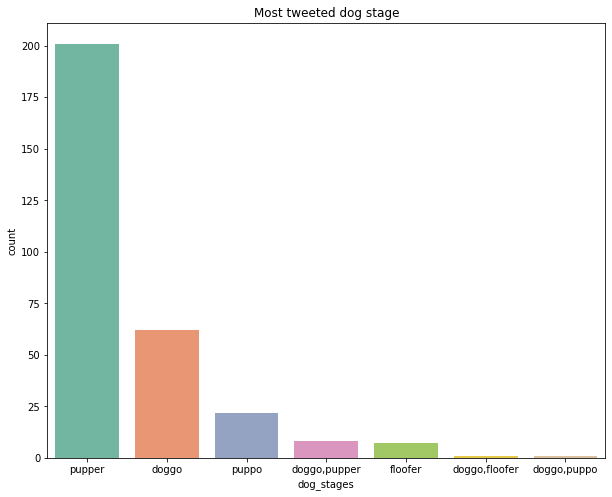

In [114]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'dog_stages', y = 'count', data = stages, palette = 'Set2')
plt.title('Most tweeted dog stage');

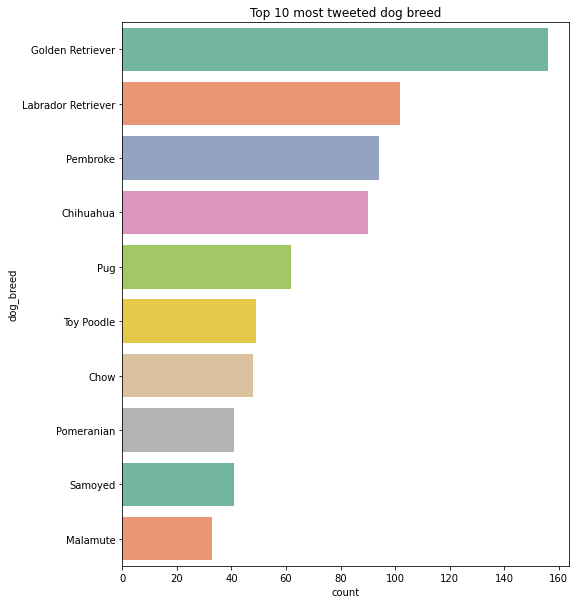

In [109]:
plt.figure(figsize=(8,10))
sns.barplot(x = 'count', y = 'dog_breed', data = top_10_breeds, palette = 'Set2')
plt.title('Top 10 most tweeted dog breed');

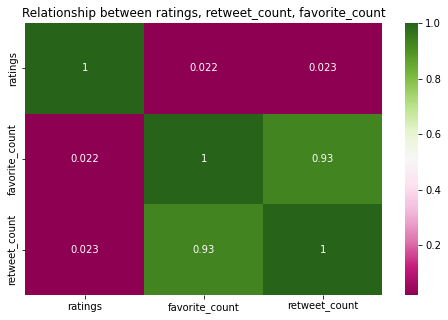

In [110]:
# Set figure size
plt.figure(figsize=(8,5))

# Plot correlation using heapmap
sns.heatmap(corr, annot=True, cmap='PiYG');

# set plot title
plt.title('Relationship between ratings, retweet_count, favorite_count');

## References

- https://stackoverflow.com/questions/22341271/get-list-from-pandas-dataframe-column-or-row
- https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
- https://www.programiz.com/python-programming/json
- https://www.freecodecamp.org/news/python-read-json-file-how-to-load-json-from-a-file-and-parse-dumps/
- https://docs.tweepy.org/en/stable/exceptions.html
- https://www.geeksforgeeks.org/python-assert-keyword/
- https://sparkbyexamples.com/pandas/pandas-apply-function-to-every-row/
- https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html